<a href="https://colab.research.google.com/github/LDJ5098/machineLearning_class/blob/main/%EB%B9%84%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0.9889354346720892
0.9856564835209134
[1309.43411269]


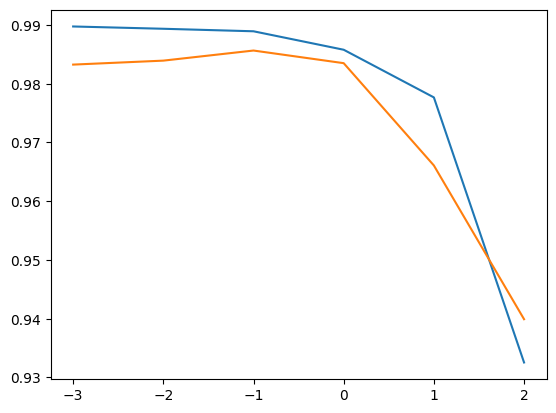

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

df = pd.read_csv('http://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_full,perch_weight,random_state=42)
p_data=[[50,13,8]]

poly=PolynomialFeatures(degree=2, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
p_data1=poly.transform(p_data)

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)
p_data2=ss.transform(p_data1)

train_score = []
test_score = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list :
  ridge = Ridge(alpha=a)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

import matplotlib.pyplot as plt
#plt.plot(alpha_list, train_score)
plt.plot(np.log10(alpha_list),train_score)
#plt.plot(alpha_list, test_score)
plt.plot(np.log10(alpha_list),test_score)

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))
print(ridge.predict(p_data2))


In [ ]:
!wget https://bit.ly/fruits_300_data -o fruits_300.npy

In [ ]:
!ls -al

total 2956
drwxr-xr-x 1 root root    4096 Nov  7 05:21 .
drwxr-xr-x 1 root root    4096 Nov  7 05:19 ..
drwxr-xr-x 4 root root    4096 Sep 20 13:21 .config
-rw-r--r-- 1 root root 3000128 Nov  7 05:21 fruits_300_data
-rw-r--r-- 1 root root    5706 Nov  7 05:21 fruits_300.npy
drwxr-xr-x 1 root root    4096 Sep 20 13:22 sample_data


In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)

(300, 100, 100)


[  5   1   1   3   2  45  84  78  76  74  76  75  74  75  72  67  65  65
  64  63  62  60  59  62  58  55  54  54  53  52  50  49  51  52  53  53
  54  56  59  62  65  67  71  74  76  79  83  86  90  94  97  99 102 105
 108 112 115 120 124 127 133 138 143 149 155 156 157 162 170 174 175 176
 181 187 194 201 204 206 210 216 222 225 228 232 234 236 237 237 237 235
 237 238 234 229 114   1   1   1   1   1]


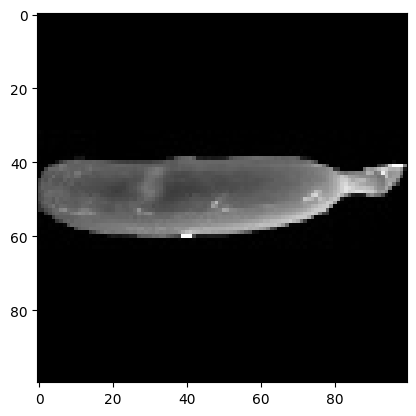

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(fruits[200], cmap='gray')
plt.show


print(fruits[0, 50, :])

In [ ]:
import matplotlib.pyplot as plt
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits [100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)


apple_mean = apple.mean(axis=0).reshape(100, 100)
pineapple_mean = pineapple.mean (axis=0).reshape(100,100)
banana_mean = banana.mean(axis=0).reshape(100,100)

abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_diff.shape)
print(abs_mean.shape)

apple_index = np.argsort(abs_mean) [0:100]
print(apple_index)

(300, 100, 100)
(300,)
[33 48 70 57 87 12 78 59  1 74 86 38 50 92 69 27 68 30 66 24 76 98 15 84
 47 90  3 94 53 23 14 71 32  7 73 36 55 77 21 10 17 39 99 95 11 35 65  6
 61 22 56 89  2 13 80  0 97  4 58 34 40 43 75 82 54 16 31 49 93 37 63 64
 41 28 67 25 96  8 83 46 19 79 72  5 85 29 20 60 81  9 45 51 88 62 91 26
 52 18 44 42]


In [ ]:
import numpy as np
fruits = np.load('fruits_300_data')
print(fruits.shape)
fruits_2d = fruits.reshape(-1, 100*100)
print(fruits_2d.shape)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

(300, 100, 100)
(300, 10000)
[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
